In [ ]:
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/00462/drugsCom_raw.zip

--2021-06-20 14:49:45--  https://archive.ics.uci.edu/ml/machine-learning-databases/00462/drugsCom_raw.zip
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 42989872 (41M) [application/x-httpd-php]
Saving to: ‘drugsCom_raw.zip.2’

drugsCom_raw.zip.2  100%[===================>]  41.00M  14.8MB/s    in 2.8s    

2021-06-20 14:49:48 (14.8 MB/s) - ‘drugsCom_raw.zip.2’ saved [42989872/42989872]



• The drug review data set is taken from the UCI machine learning repository. This data set provides patient reviews of specific drugs and related conditions and 10-star patient ratings that reflect overall patient satisfaction. This data was obtained by scraping online drug review sites. The shape of the drug review data set is (161297, 7), which means it has 7 features, including review and 161297 data points or entries.

• The features are 'drugName' which is the name of the drug, 'condition' which is the condition the patient is suffering from, 'review' is the patients review, 'rating' is the 10-star patient rating for the drug, 'date' is the date of the entry and the 'usefulcount' is the number of users who found the review useful.

• Here the sentiment of the review is the target variable that needs to be predicted. here we can notice that the sentiment of any review is not given, so we have to give the sentiment to the rating first and then use it as the target variable.

In [ ]:
!unzip -x "/content/drugsCom_raw.zip"

Archive:  /content/drugsCom_raw.zip
replace drugsComTest_raw.tsv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace drugsComTrain_raw.tsv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n


In [ ]:
import pandas as pd
df_train = pd.read_table('/content/drugsComTrain_raw.tsv')
df_test = pd.read_table('/content/drugsComTest_raw.tsv')

In [ ]:
df_train.head()

,Unnamed: 0,drugName,condition,review,rating,date,usefulCount
0,206461,Valsartan,Left Ventricular Dysfunction,"""It has no side effect, I take it in combinati...",9.0,"May 20, 2012",27
1,95260,Guanfacine,ADHD,"""My son is halfway through his fourth week of ...",8.0,"April 27, 2010",192
2,92703,Lybrel,Birth Control,"""I used to take another oral contraceptive, wh...",5.0,"December 14, 2009",17
3,138000,Ortho Evra,Birth Control,"""This is my first time using any form of birth...",8.0,"November 3, 2015",10
4,35696,Buprenorphine / naloxone,Opiate Dependence,"""Suboxone has completely turned my life around...",9.0,"November 27, 2016",37


In [ ]:
df_test.head()

,Unnamed: 0,drugName,condition,review,rating,date,usefulCount
0,163740,Mirtazapine,Depression,"""I&#039;ve tried a few antidepressants over th...",10.0,"February 28, 2012",22
1,206473,Mesalamine,"Crohn's Disease, Maintenance","""My son has Crohn&#039;s disease and has done ...",8.0,"May 17, 2009",17
2,159672,Bactrim,Urinary Tract Infection,"""Quick reduction of symptoms""",9.0,"September 29, 2017",3
3,39293,Contrave,Weight Loss,"""Contrave combines drugs that were used for al...",9.0,"March 5, 2017",35
4,97768,Cyclafem 1 / 35,Birth Control,"""I have been on this birth control for one cyc...",9.0,"October 22, 2015",4


## Data Cleaning

In [ ]:
print("number of null values in each column the training dataset {}".format(df_train.isnull().sum()))

number of null values in each column the training dataset Unnamed: 0       0
drugName         0
condition      899
review           0
rating           0
date             0
usefulCount      0
dtype: int64


In [ ]:
print("number of null values in each column the training dataset {}".format(df_test.isnull().sum()))

number of null values in each column the training dataset Unnamed: 0       0
drugName         0
condition      295
review           0
rating           0
date             0
usefulCount      0
dtype: int64


### Train and test datasets have no null values for all the columns except for the condition column so we will delete the rows that contains null values first ,because we don't need to fill the null values to guarantee the reliability and quality of the data Second the number of rows with null values is negligible compared to the size of the dataset of the train and test set 

In [ ]:
df_train.dropna(subset=['condition'],how="any",inplace=True)
df_train.isnull().sum()

Unnamed: 0     0
drugName       0
condition      0
review         0
rating         0
date           0
usefulCount    0
dtype: int64

In [ ]:
df_test.dropna(subset=['condition'],how="any",inplace=True)
df_test.isnull().sum()

Unnamed: 0     0
drugName       0
condition      0
review         0
rating         0
date           0
usefulCount    0
dtype: int64

In [ ]:
print("Number of Corrupted Reviews: ",len(df_train[df_train.condition.str.contains(" users found this comment helpful.",na=False)]))

Number of Corrupted Reviews:  900


condition is a field which present problems in 900 registers, probably due to some bug in the data web scraping. The value of those registers is the usefulCount value with an span HTML tag and the following text: "users found this comment helpful". We will delete these registers.

In [ ]:
df_train = df_train[~df_train.condition.str.contains(" users found this comment helpful.",na=False)]

In [ ]:
print("Number of Corrupted Reviews: ",len(df_train[df_train.condition.str.contains(" users found this comment helpful.",na=False)]))

Number of Corrupted Reviews:  0


## Descriptive Statistics

In [ ]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 53471 entries, 0 to 53765
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   53471 non-null  int64  
 1   drugName     53471 non-null  object 
 2   condition    53471 non-null  object 
 3   review       53471 non-null  object 
 4   rating       53471 non-null  float64
 5   date         53471 non-null  object 
 6   usefulCount  53471 non-null  int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 3.3+ MB


In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 159498 entries, 0 to 161296
Data columns (total 7 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Unnamed: 0   159498 non-null  int64  
 1   drugName     159498 non-null  object 
 2   condition    159498 non-null  object 
 3   review       159498 non-null  object 
 4   rating       159498 non-null  float64
 5   date         159498 non-null  object 
 6   usefulCount  159498 non-null  int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 9.7+ MB


In [ ]:
# as both the dataset contains same columns we can combine them for better analysis

data = pd.concat([df_train, df_test])
data.head()

,Unnamed: 0,drugName,condition,review,rating,date,usefulCount
0,206461,Valsartan,Left Ventricular Dysfunction,"""It has no side effect, I take it in combinati...",9.0,"May 20, 2012",27
1,95260,Guanfacine,ADHD,"""My son is halfway through his fourth week of ...",8.0,"April 27, 2010",192
2,92703,Lybrel,Birth Control,"""I used to take another oral contraceptive, wh...",5.0,"December 14, 2009",17
3,138000,Ortho Evra,Birth Control,"""This is my first time using any form of birth...",8.0,"November 3, 2015",10
4,35696,Buprenorphine / naloxone,Opiate Dependence,"""Suboxone has completely turned my life around...",9.0,"November 27, 2016",37


In [ ]:
data.describe()

,Unnamed: 0,rating,usefulCount
count,212969.000000,212969.000000,212969.000000
mean,116072.407928,6.992046,28.165043
std,67003.318924,3.275969,36.442253
min,0.000000,1.000000,0.000000
25%,58135.000000,5.000000,6.000000
50%,115953.000000,8.000000,16.000000
75%,174005.000000,10.000000,37.000000
max,232291.000000,10.000000,1291.000000


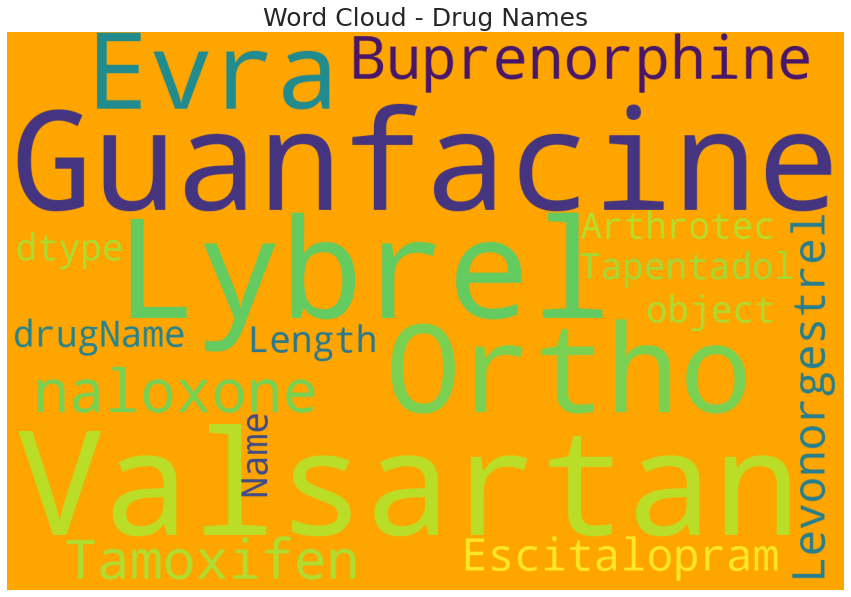

In [ ]:
# most popular drugs

from wordcloud import WordCloud
from wordcloud import STOPWORDS
import matplotlib.pyplot as plt

stopwords = set(STOPWORDS)

wordcloud = WordCloud(background_color = 'orange', stopwords = stopwords, width = 1200, height = 800).generate(str(data['drugName']))

plt.rcParams['figure.figsize'] = (15, 15)
plt.title('Word Cloud - Drug Names', fontsize = 25)
print(wordcloud)
plt.axis('off')
plt.imshow(wordcloud)
plt.show()

# • This is a word cloud for the DRUG NAMES

# • barplot shows the top 20 drugs with the 10/10 rating

In [ ]:
data.loc[data.rating == 10, "drugName"].value_counts()

Levonorgestrel                       1883
Phentermine                          1079
Etonogestrel                          864
Varenicline                           662
Ethinyl estradiol / norethindrone     601
                                     ... 
Drixoral Cold / Flu                     1
Immune globulin oral                    1
Mevacor                                 1
Pregnyl                                 1
Sectral                                 1
Name: drugName, Length: 2911, dtype: int64

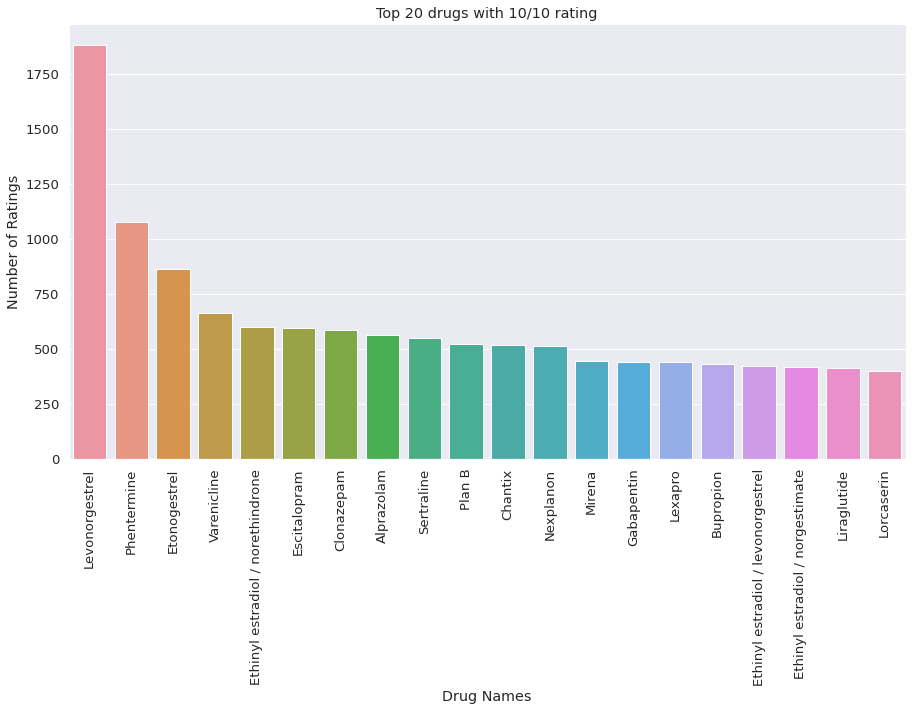

In [ ]:
import seaborn as sns
# This 

# Setting the Parameter
sns.set(font_scale = 1.2, style = 'darkgrid')
plt.rcParams['figure.figsize'] = [15, 8]

rating = dict(data.loc[data.rating == 10, "drugName"].value_counts())
drugname = list(rating.keys())
drug_rating = list(rating.values())

sns_rating = sns.barplot(x = drugname[0:20], y = drug_rating[0:20])

sns_rating.set_title('Top 20 drugs with 10/10 rating')
sns_rating.set_ylabel("Number of Ratings")
sns_rating.set_xlabel("Drug Names")
plt.setp(sns_rating.get_xticklabels(), rotation=90);

# • The is a bar graph which shows the top 20 drugs given in the data set with a rating of 10/10. 'Levonorgestrel' is the drug with the highest number of 10/10 ratings, about 1883 Ratings in the data set for 'Levonorgestrel'.


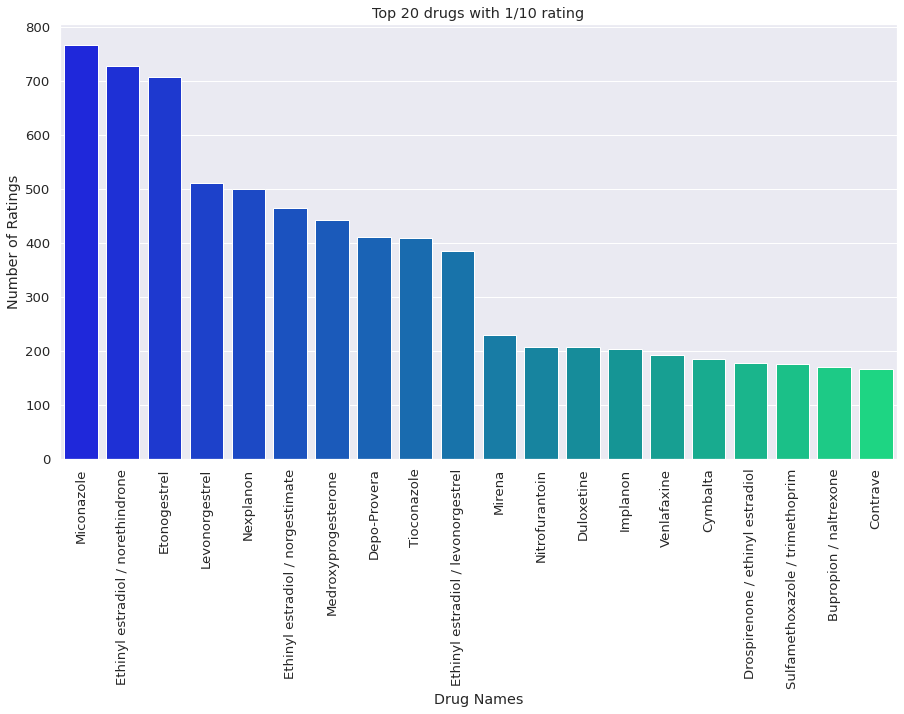

In [ ]:
sns.set(font_scale = 1.2, style = 'darkgrid')
plt.rcParams['figure.figsize'] = [15, 8]

rating = dict(data.loc[data.rating == 1, "drugName"].value_counts())
drugname = list(rating.keys())
drug_rating = list(rating.values())

sns_rating = sns.barplot(x = drugname[0:20], y = drug_rating[0:20], palette = 'winter')

sns_rating.set_title('Top 20 drugs with 1/10 rating')
sns_rating.set_ylabel("Number of Ratings")
sns_rating.set_xlabel("Drug Names")
plt.setp(sns_rating.get_xticklabels(), rotation=90);

## • The is a bar graph thatshows the top 20 drugs given in the data set with a rating of 1/10. 'Miconazole' is the drug with the highest number of 1/10 ratings, about 767.

# • making a donut chart to represent share of each ratings

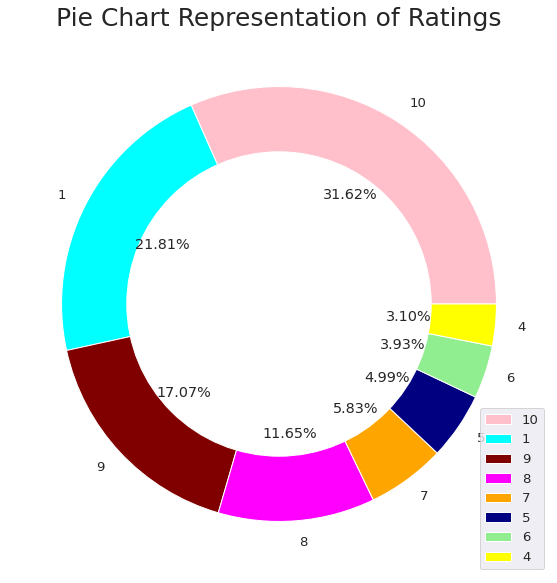

In [ ]:
size = [68005, 46901, 36708, 25046, 12547, 10723, 8462, 6671]
colors = ['pink', 'cyan', 'maroon',  'magenta', 'orange', 'navy', 'lightgreen', 'yellow']
labels = "10", "1", "9", "8", "7", "5", "6", "4"

my_circle = plt.Circle((0, 0), 0.7, color = 'white')

plt.rcParams['figure.figsize'] = (10, 10)
plt.pie(size, colors = colors, labels = labels, autopct = '%.2f%%')
plt.axis('off')
plt.title('Pie Chart Representation of Ratings', fontsize = 25)
p = plt.gcf()
plt.gca().add_artist(my_circle)
plt.legend()
plt.show()


# •countplot of the ratings so we can see the distribution of the ratings

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 0, 'Rating')

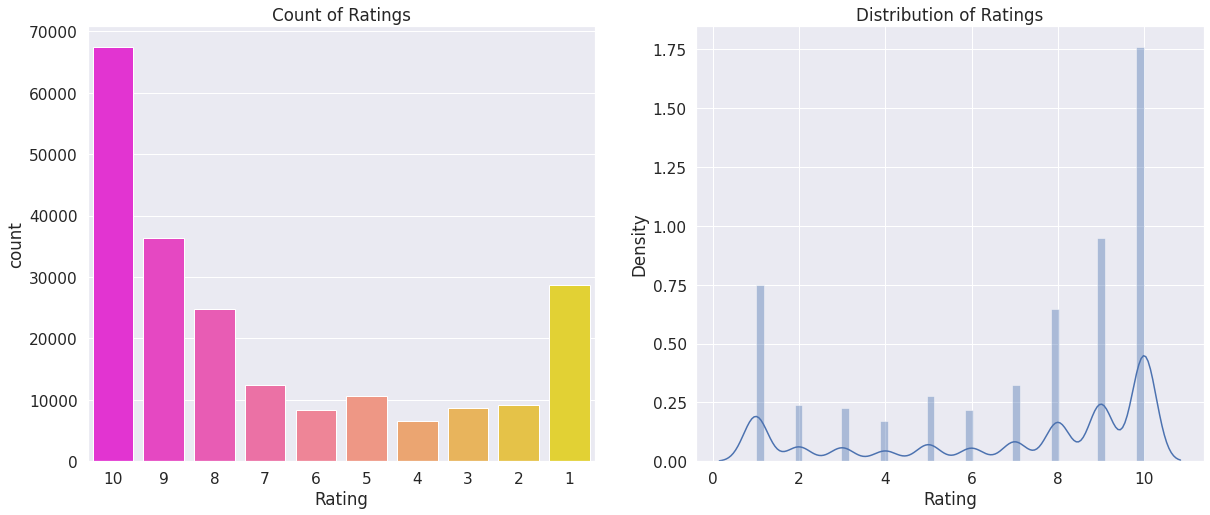

In [ ]:
plt.rcParams['figure.figsize'] = [20,8]
sns.set(font_scale = 1.4, style = 'darkgrid')
fig, ax = plt.subplots(1, 2)

sns_1 = sns.countplot(data['rating'], palette = 'spring', order = list(range(10, 0, -1)), ax = ax[0])
sns_2 = sns.distplot(data['rating'], ax = ax[1])
sns_1.set_title('Count of Ratings')
sns_1.set_xlabel("Rating")

sns_2.set_title('Distribution of Ratings')
sns_2.set_xlabel("Rating")

# • The shows a distribution plot on the right hand side and a bar graph of the same on the left hand side. This shows the distribution of the ratings from 1 to 10 in the data set.


# • barplot show the top 10 conditions the people are suffering.

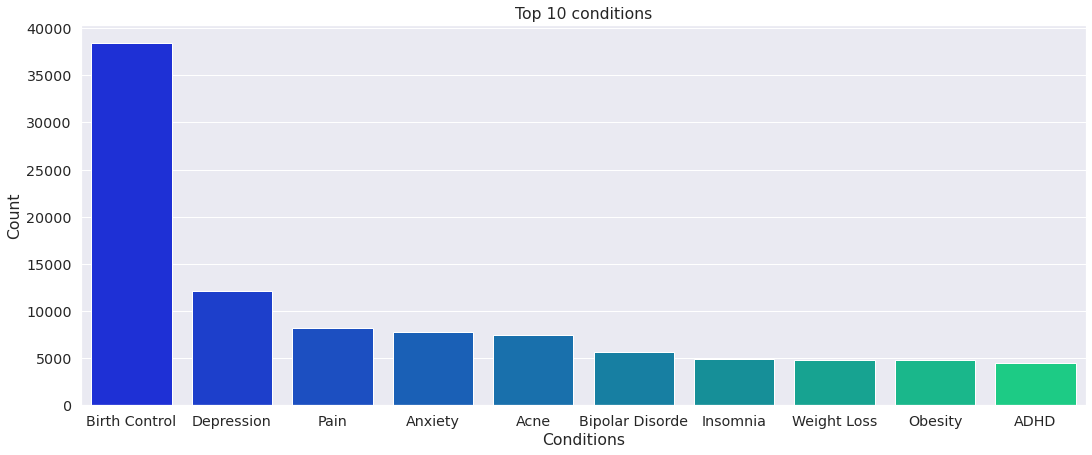

In [ ]:
cond = dict(data['condition'].value_counts())
top_condition = list(cond.keys())[0:10]
values = list(cond.values())[0:10]
sns.set(style = 'darkgrid', font_scale = 1.3)
plt.rcParams['figure.figsize'] = [18, 7]

sns_ = sns.barplot(x = top_condition, y = values, palette = 'winter')
sns_.set_title("Top 10 conditions")
sns_.set_xlabel("Conditions")
sns_.set_ylabel("Count");

# • The is a bar graph which exhibits the top 10 conditions the people are suffering from. In this data set 'Birth Control' is the most prominent condition by a very big margin followed by Depression and pain.


# • Top 10 drugs which are used for the top condition, that is Birth Control

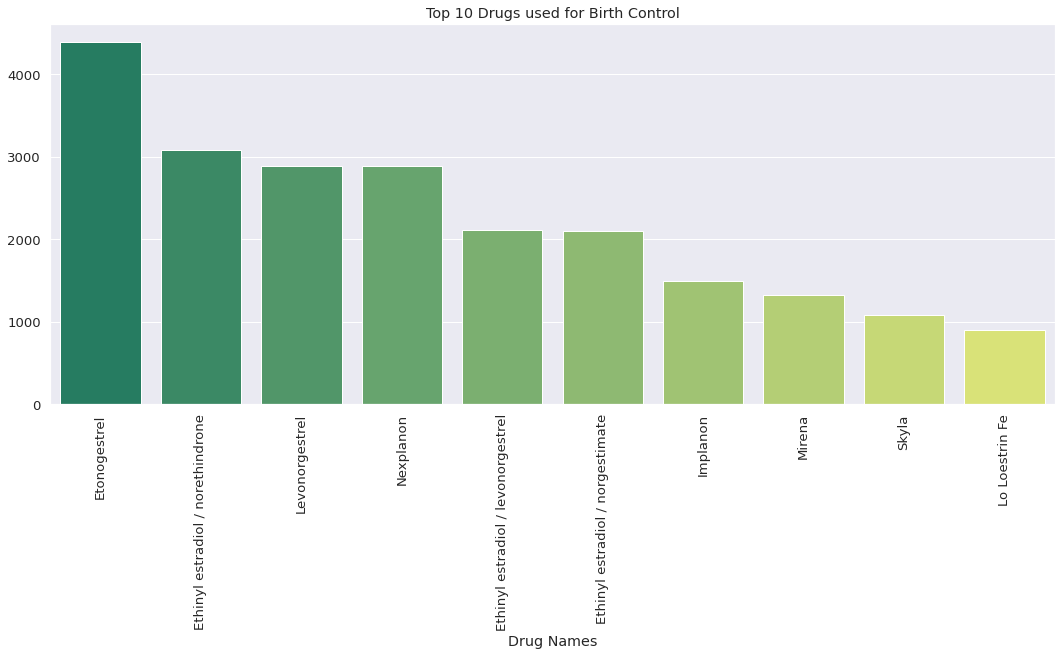

In [ ]:
df1 = data[data['condition'] == 'Birth Control']['drugName'].value_counts()[0: 10]
sns.set(font_scale = 1.2, style = 'darkgrid')

sns_ = sns.barplot(x = df1.index, y = df1.values, palette = 'summer')
sns_.set_xlabel('Drug Names')
sns_.set_title("Top 10 Drugs used for Birth Control")
plt.setp(sns_.get_xticklabels(), rotation = 90);

# • The is a bar graph which exhibits the top 10 drug names for the people suffering from Birth Control. In this data set 'Etonogestrel' is the most prominent drug by a very big margin.


# • the words cloud for the reviews 


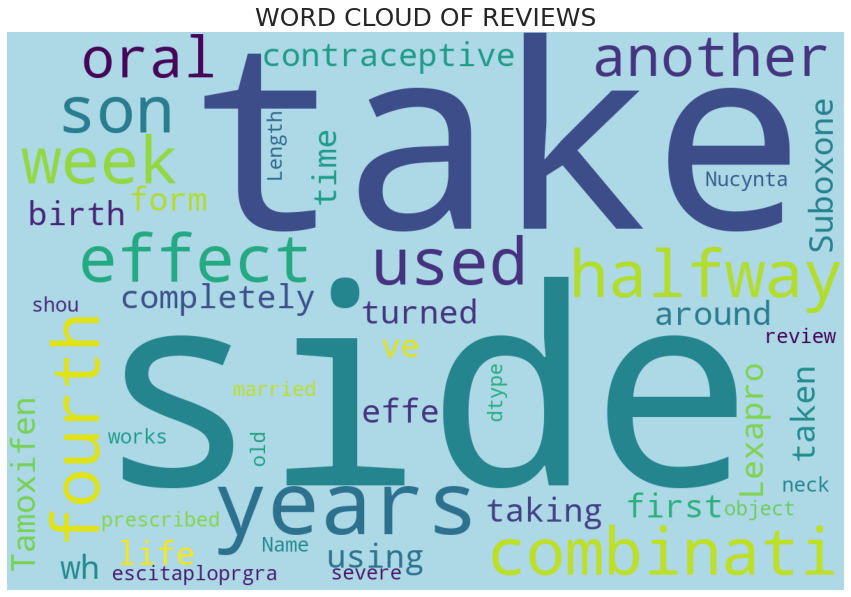

In [ ]:
from wordcloud import WordCloud
from wordcloud import STOPWORDS

stopwords = set(STOPWORDS)

wordcloud = WordCloud(background_color = 'lightblue', stopwords = stopwords, width = 1200, height = 800).generate(str(data['review']))

plt.rcParams['figure.figsize'] = (15, 15)
plt.title('WORD CLOUD OF REVIEWS', fontsize = 25)
print(wordcloud)
plt.axis('off')
plt.imshow(wordcloud)
plt.show()

# • to predict the sentiment of the patients we need to create a new column called Review_Sentiment where the the sentiment is positive when the review is > 5 else it will be negative 

In [ ]:
data.loc[(data['rating'] > 5), 'Review_Sentiment'] = 1
data.loc[(data['rating'] <= 5), 'Review_Sentiment'] = 0

data['Review_Sentiment'].value_counts()

1.0    149355
0.0     63614
Name: Review_Sentiment, dtype: int64

# • pie chart to represent the sentiments of the patients

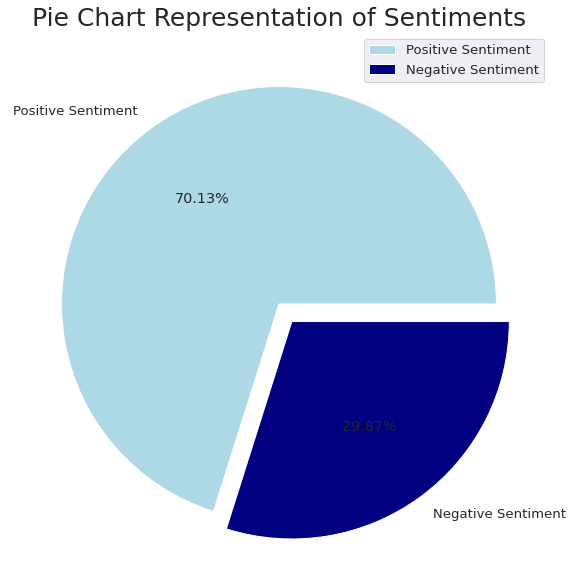

In [ ]:
size = list(data['Review_Sentiment'].value_counts().values)
colors = ['lightblue', 'navy']
labels = "Positive Sentiment","Negative Sentiment"
explode = [0, 0.1]

plt.rcParams['figure.figsize'] = (10, 10)
plt.pie(size, colors = colors, labels = labels, explode = explode, autopct = '%.2f%%')
plt.axis('off')
plt.title('Pie Chart Representation of Sentiments', fontsize = 25)
plt.legend()
plt.show()

# • Words cloud for the postive sentiments

In [ ]:
positive_sentiments = " ".join([text for text in data['review'][data['Review_Sentiment'] == 1]])

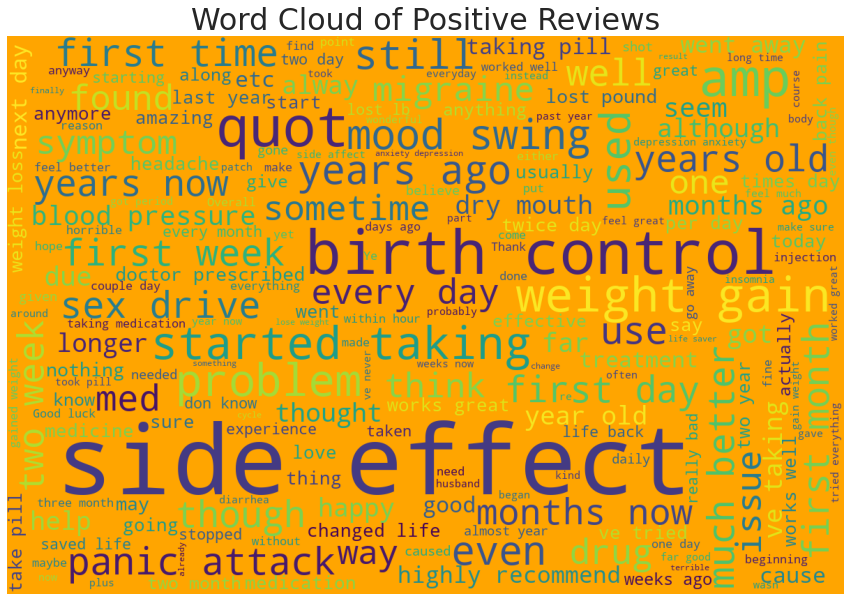

In [ ]:
from wordcloud import WordCloud
from wordcloud import STOPWORDS

stopwords = set(STOPWORDS)
wordcloud = WordCloud(background_color = 'orange', stopwords = stopwords, width = 1200, height = 800).generate(positive_sentiments)

plt.rcParams['figure.figsize'] = (15, 15)
plt.title('Word Cloud of Positive Reviews', fontsize = 30)
print(wordcloud)
plt.axis('off')
plt.imshow(wordcloud)
plt.show()

# • wordscloud for the Negative sentiments


In [ ]:
negative_sentiments = " ".join([text for text in data['review'][data['Review_Sentiment'] == 0]])

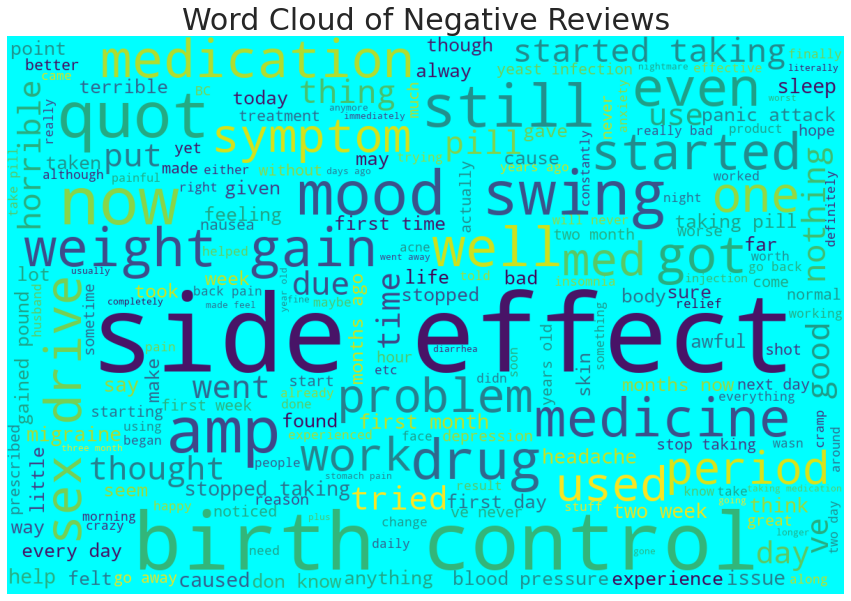

In [ ]:
from wordcloud import WordCloud
from wordcloud import STOPWORDS

stopwords = set(STOPWORDS)
wordcloud = WordCloud(background_color = 'cyan', stopwords = stopwords, width = 1200, height = 800).generate(negative_sentiments)

plt.rcParams['figure.figsize'] = (15, 15)
plt.title('Word Cloud of Negative Reviews', fontsize = 30)
print(wordcloud)
plt.axis('off')
plt.imshow(wordcloud)
plt.show()

# • VISUALIZATION OF USEFUL COUNT

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


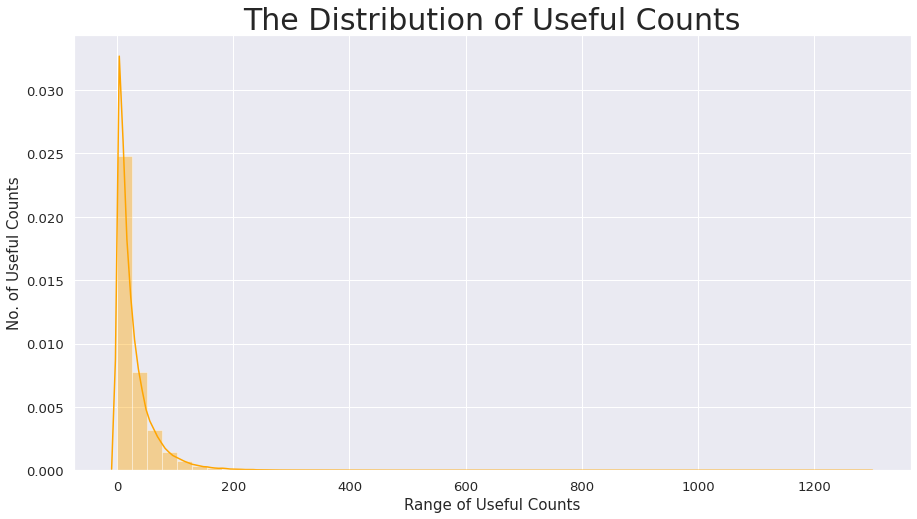

In [ ]:
# plotting a dist plot

plt.rcParams['figure.figsize'] = (15, 8)
sns.distplot(data['usefulCount'], color = 'orange')
plt.title('The Distribution of Useful Counts', fontsize = 30)
plt.xlabel('Range of Useful Counts', fontsize = 15)
plt.ylabel('No. of Useful Counts', fontsize = 15)
plt.show()

# • DATA PREPROCESSING / FEATURE ENGINEERING

In [ ]:
import string
from nltk.corpus import stopwords
import nltk
nltk.download('averaged_perceptron_tagger')
import re
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from nltk.corpus import wordnet
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
# remove punctuations
from nltk.stem import WordNetLemmatizer
def get_wordnet_pos(treebank_tag):

    if treebank_tag.startswith('J'):
        return wordnet.ADJ
    elif treebank_tag.startswith('V'):
        return wordnet.VERB
    elif treebank_tag.startswith('N'):
        return wordnet.NOUN
    elif treebank_tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN
def remove_punct(text):
    nopunct = ""
    for c in text:
        if c not in string.punctuation:
            nopunct = nopunct + c
    return nopunct

# remove numbers
def remove_numbers(text):
    return re.sub(r'[0-9]', '', text)

# Replacing the repeating pattern of &#039;
def remove_repeating_pattern(text):
    return re.sub(r"&#039;", '', text)

# Removing all the special Characters
def special_Characters(text):
    return re.sub(r'[^\w\d\s]',"",text)
# Removing all the non ASCII characters
def non_ASCII(text):
    return re.sub(r'[^\x00-\x7F]+',"",text)

# Replacing multiple Spaces with Single Space
def rm_multiple_spaces(text):
    return re.sub(r'\s+'," ",text)
# Replacing Two or more dots with one
def rm_dots(text):
  return re.sub(r'\.{2,}',".",text)

def remove_stopwords(word_list):
    stopwords_list = stopwords.words('english')
    word_list = [word for word in word_list if word not in stopwords_list]
    return word_list

def lemmetized_word(word_list):
    pos_dict = dict(nltk.pos_tag(word_list))
    lemmatizer = WordNetLemmatizer()
    word_list = [lemmatizer.lemmatize(t,pos=get_wordnet_pos(pos_dict.get(t))) for t in word_list]
    return word_list

def clean_text(text):
    text=remove_repeating_pattern(text)
    text=remove_punct(text)
    text=remove_numbers(text)
    text=special_Characters(text)
    text=non_ASCII(text)
    text=rm_dots(text)
    text=rm_multiple_spaces(text)
    word_list=word_tokenize(text)
    word_list = remove_stopwords(word_list)
    word_list=lemmetized_word(word_list)

    return " ".join(word_list)

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [ ]:
from tqdm import tqdm, tqdm_notebook
tqdm_notebook().pandas()
import numpy as np
import pandas as pd
data['clean_reviews']=data['review'].progress_apply(clean_text)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  


/usr/local/lib/python3.7/dist-packages/tqdm/std.py:658: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  from pandas import Panel


In [ ]:
data.head()

,Unnamed: 0,drugName,condition,review,rating,date,usefulCount,Review_Sentiment,clean_reviews
0,206461,Valsartan,Left Ventricular Dysfunction,"""It has no side effect, I take it in combinati...",9.0,"May 20, 2012",27,1.0,It side effect I take combination Bystolic Mg ...
1,95260,Guanfacine,ADHD,"""My son is halfway through his fourth week of ...",8.0,"April 27, 2010",192,1.0,My son halfway fourth week Intuniv We become c...
2,92703,Lybrel,Birth Control,"""I used to take another oral contraceptive, wh...",5.0,"December 14, 2009",17,0.0,I use take another oral contraceptive pill cyc...
3,138000,Ortho Evra,Birth Control,"""This is my first time using any form of birth...",8.0,"November 3, 2015",10,1.0,This first time use form birth control Im glad...
4,35696,Buprenorphine / naloxone,Opiate Dependence,"""Suboxone has completely turned my life around...",9.0,"November 27, 2016",37,1.0,Suboxone completely turn life around I feel he...


## Vectorize Data using TF-IDF

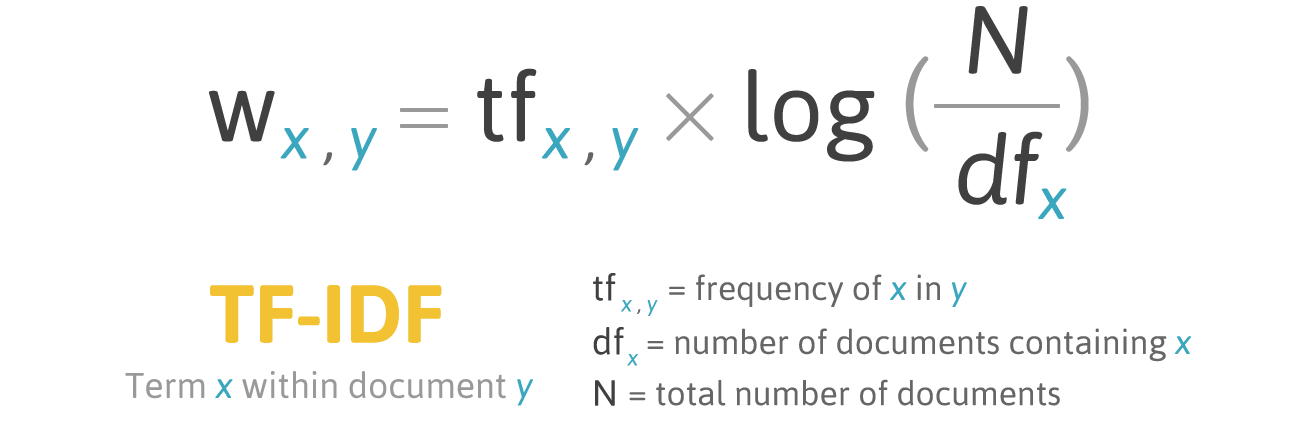

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
tv = TfidfVectorizer (sublinear_tf=True,
                      strip_accents='unicode',
                      analyzer='word',token_pattern=r'\w{1,}',
                      stop_words='english',
                      ngram_range=(2, 2),
                      norm='l2',
                      min_df=0,
                      smooth_idf=False,
                      max_features=80)

In [ ]:
tv_transformed = tv.fit_transform(data['clean_reviews'])

In [ ]:
tv_transformed

<212969x80 sparse matrix of type '<class 'numpy.float64'>'
	with 276066 stored elements in Compressed Sparse Row format>

In [ ]:
tv_df = pd.DataFrame(tv_transformed.toarray(), columns=tv.get_feature_names()).add_prefix('TFIDF_')


In [ ]:
tv_df.head()

,TFIDF_anxiety depression,TFIDF_bad effect,TFIDF_birth control,TFIDF_blood pressure,TFIDF_change life,TFIDF_couple day,TFIDF_day ago,TFIDF_day day,TFIDF_day feel,TFIDF_day im,TFIDF_day period,TFIDF_day start,TFIDF_day week,TFIDF_depression anxiety,TFIDF_didnt work,TFIDF_doctor prescribe,TFIDF_doctor say,TFIDF_doctor tell,TFIDF_dont feel,TFIDF_dont know,TFIDF_dont want,TFIDF_dose mg,TFIDF_dry mouth,TFIDF_fall asleep,TFIDF_feel good,TFIDF_feel great,TFIDF_feel like,TFIDF_felt like,TFIDF_gain lbs,TFIDF_gain pound,TFIDF_gain weight,TFIDF_good luck,TFIDF_highly recommend,TFIDF_hot flash,TFIDF_hour later,TFIDF_im happy,TFIDF_im sure,TFIDF_im year,TFIDF_ive try,TFIDF_ive use,TFIDF_long time,TFIDF_lose lbs,TFIDF_lose pound,TFIDF_lose weight,TFIDF_low dose,TFIDF_make feel,TFIDF_make sure,TFIDF_medicine work,TFIDF_mg day,TFIDF_mg mg,TFIDF_mg twice,TFIDF_month ago,TFIDF_month start,TFIDF_mood swing,TFIDF_panic attack,TFIDF_past year,TFIDF_period day,TFIDF_period month,TFIDF_period week,TFIDF_pill day,TFIDF_plan b,TFIDF_read review,TFIDF_really bad,TFIDF_really help,TFIDF_save life,TFIDF_sex drive,TFIDF_sleep night,TFIDF_start feel,TFIDF_start mg,TFIDF_time day,TFIDF_twice day,TFIDF_week ago,TFIDF_week start,TFIDF_weight gain,TFIDF_weight loss,TFIDF_work great,TFIDF_x day,TFIDF_year ago,TFIDF_year old,TFIDF_yeast infection
0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.506346,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.862331,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.621942,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.563720,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.543514,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
tv_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 212969 entries, 0 to 212968
Data columns (total 80 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   TFIDF_anxiety depression  212969 non-null  float64
 1   TFIDF_bad effect          212969 non-null  float64
 2   TFIDF_birth control       212969 non-null  float64
 3   TFIDF_blood pressure      212969 non-null  float64
 4   TFIDF_change life         212969 non-null  float64
 5   TFIDF_couple day          212969 non-null  float64
 6   TFIDF_day ago             212969 non-null  float64
 7   TFIDF_day day             212969 non-null  float64
 8   TFIDF_day feel            212969 non-null  float64
 9   TFIDF_day im              212969 non-null  float64
 10  TFIDF_day period          212969 non-null  float64
 11  TFIDF_day start           212969 non-null  float64
 12  TFIDF_day week            212969 non-null  float64
 13  TFIDF_depression anxiety  212969 non-null  f

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 212969 entries, 0 to 53765
Data columns (total 9 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        212969 non-null  int64  
 1   drugName          212969 non-null  object 
 2   condition         212969 non-null  object 
 3   review            212969 non-null  object 
 4   rating            212969 non-null  float64
 5   date              212969 non-null  object 
 6   usefulCount       212969 non-null  int64  
 7   Review_Sentiment  212969 non-null  float64
 8   clean_reviews     212969 non-null  object 
dtypes: float64(2), int64(2), object(5)
memory usage: 21.2+ MB


In [ ]:
data = data.reset_index()

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 212969 entries, 0 to 212968
Data columns (total 10 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   index             212969 non-null  int64  
 1   Unnamed: 0        212969 non-null  int64  
 2   drugName          212969 non-null  object 
 3   condition         212969 non-null  object 
 4   review            212969 non-null  object 
 5   rating            212969 non-null  float64
 6   date              212969 non-null  object 
 7   usefulCount       212969 non-null  int64  
 8   Review_Sentiment  212969 non-null  float64
 9   clean_reviews     212969 non-null  object 
dtypes: float64(2), int64(3), object(5)
memory usage: 16.2+ MB


In [ ]:
data = pd.concat([data, tv_df], axis=1, sort=False)
data.head()

,index,Unnamed: 0,drugName,condition,review,rating,date,usefulCount,Review_Sentiment,clean_reviews,TFIDF_anxiety depression,TFIDF_bad effect,TFIDF_birth control,TFIDF_blood pressure,TFIDF_change life,TFIDF_couple day,TFIDF_day ago,TFIDF_day day,TFIDF_day feel,TFIDF_day im,TFIDF_day period,TFIDF_day start,TFIDF_day week,TFIDF_depression anxiety,TFIDF_didnt work,TFIDF_doctor prescribe,TFIDF_doctor say,TFIDF_doctor tell,TFIDF_dont feel,TFIDF_dont know,TFIDF_dont want,TFIDF_dose mg,TFIDF_dry mouth,TFIDF_fall asleep,TFIDF_feel good,TFIDF_feel great,TFIDF_feel like,TFIDF_felt like,TFIDF_gain lbs,TFIDF_gain pound,...,TFIDF_long time,TFIDF_lose lbs,TFIDF_lose pound,TFIDF_lose weight,TFIDF_low dose,TFIDF_make feel,TFIDF_make sure,TFIDF_medicine work,TFIDF_mg day,TFIDF_mg mg,TFIDF_mg twice,TFIDF_month ago,TFIDF_month start,TFIDF_mood swing,TFIDF_panic attack,TFIDF_past year,TFIDF_period day,TFIDF_period month,TFIDF_period week,TFIDF_pill day,TFIDF_plan b,TFIDF_read review,TFIDF_really bad,TFIDF_really help,TFIDF_save life,TFIDF_sex drive,TFIDF_sleep night,TFIDF_start feel,TFIDF_start mg,TFIDF_time day,TFIDF_twice day,TFIDF_week ago,TFIDF_week start,TFIDF_weight gain,TFIDF_weight loss,TFIDF_work great,TFIDF_x day,TFIDF_year ago,TFIDF_year old,TFIDF_yeast infection
0,0,206461,Valsartan,Left Ventricular Dysfunction,"""It has no side effect, I take it in combinati...",9.0,"May 20, 2012",27,1.0,It side effect I take combination Bystolic Mg ...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,95260,Guanfacine,ADHD,"""My son is halfway through his fourth week of ...",8.0,"April 27, 2010",192,1.0,My son halfway fourth week Intuniv We become c...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2,92703,Lybrel,Birth Control,"""I used to take another oral contraceptive, wh...",5.0,"December 14, 2009",17,0.0,I use take another oral contraceptive pill cyc...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.506346,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.862331,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3,138000,Ortho Evra,Birth Control,"""This is my first time using any form of birth...",8.0,"November 3, 2015",10,1.0,This first time use form birth control Im glad...,0.0,0.0,0.621942,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.563720,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.543514,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,4,35696,Buprenorphine / naloxone,Opiate Dependence,"""Suboxone has completely turned my life around...",9.0,"November 27, 2016",37,1.0,Suboxone completely turn life around I feel he...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
data.drop( 'Unnamed: 0',axis=1,inplace=True)

In [ ]:
data.head()

,index,drugName,condition,review,rating,date,usefulCount,Review_Sentiment,clean_reviews,TFIDF_anxiety depression,TFIDF_bad effect,TFIDF_birth control,TFIDF_blood pressure,TFIDF_change life,TFIDF_couple day,TFIDF_day ago,TFIDF_day day,TFIDF_day feel,TFIDF_day im,TFIDF_day period,TFIDF_day start,TFIDF_day week,TFIDF_depression anxiety,TFIDF_didnt work,TFIDF_doctor prescribe,TFIDF_doctor say,TFIDF_doctor tell,TFIDF_dont feel,TFIDF_dont know,TFIDF_dont want,TFIDF_dose mg,TFIDF_dry mouth,TFIDF_fall asleep,TFIDF_feel good,TFIDF_feel great,TFIDF_feel like,TFIDF_felt like,TFIDF_gain lbs,TFIDF_gain pound,TFIDF_gain weight,...,TFIDF_long time,TFIDF_lose lbs,TFIDF_lose pound,TFIDF_lose weight,TFIDF_low dose,TFIDF_make feel,TFIDF_make sure,TFIDF_medicine work,TFIDF_mg day,TFIDF_mg mg,TFIDF_mg twice,TFIDF_month ago,TFIDF_month start,TFIDF_mood swing,TFIDF_panic attack,TFIDF_past year,TFIDF_period day,TFIDF_period month,TFIDF_period week,TFIDF_pill day,TFIDF_plan b,TFIDF_read review,TFIDF_really bad,TFIDF_really help,TFIDF_save life,TFIDF_sex drive,TFIDF_sleep night,TFIDF_start feel,TFIDF_start mg,TFIDF_time day,TFIDF_twice day,TFIDF_week ago,TFIDF_week start,TFIDF_weight gain,TFIDF_weight loss,TFIDF_work great,TFIDF_x day,TFIDF_year ago,TFIDF_year old,TFIDF_yeast infection
0,0,Valsartan,Left Ventricular Dysfunction,"""It has no side effect, I take it in combinati...",9.0,"May 20, 2012",27,1.0,It side effect I take combination Bystolic Mg ...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,Guanfacine,ADHD,"""My son is halfway through his fourth week of ...",8.0,"April 27, 2010",192,1.0,My son halfway fourth week Intuniv We become c...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2,Lybrel,Birth Control,"""I used to take another oral contraceptive, wh...",5.0,"December 14, 2009",17,0.0,I use take another oral contraceptive pill cyc...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.506346,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.862331,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3,Ortho Evra,Birth Control,"""This is my first time using any form of birth...",8.0,"November 3, 2015",10,1.0,This first time use form birth control Im glad...,0.0,0.0,0.621942,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.563720,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.543514,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,4,Buprenorphine / naloxone,Opiate Dependence,"""Suboxone has completely turned my life around...",9.0,"November 27, 2016",37,1.0,Suboxone completely turn life around I feel he...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
list(data)

['index',
 'drugName',
 'condition',
 'review',
 'rating',
 'date',
 'usefulCount',
 'Review_Sentiment',
 'clean_reviews',
 'TFIDF_anxiety depression',
 'TFIDF_bad effect',
 'TFIDF_birth control',
 'TFIDF_blood pressure',
 'TFIDF_change life',
 'TFIDF_couple day',
 'TFIDF_day ago',
 'TFIDF_day day',
 'TFIDF_day feel',
 'TFIDF_day im',
 'TFIDF_day period',
 'TFIDF_day start',
 'TFIDF_day week',
 'TFIDF_depression anxiety',
 'TFIDF_didnt work',
 'TFIDF_doctor prescribe',
 'TFIDF_doctor say',
 'TFIDF_doctor tell',
 'TFIDF_dont feel',
 'TFIDF_dont know',
 'TFIDF_dont want',
 'TFIDF_dose mg',
 'TFIDF_dry mouth',
 'TFIDF_fall asleep',
 'TFIDF_feel good',
 'TFIDF_feel great',
 'TFIDF_feel like',
 'TFIDF_felt like',
 'TFIDF_gain lbs',
 'TFIDF_gain pound',
 'TFIDF_gain weight',
 'TFIDF_good luck',
 'TFIDF_highly recommend',
 'TFIDF_hot flash',
 'TFIDF_hour later',
 'TFIDF_im happy',
 'TFIDF_im sure',
 'TFIDF_im year',
 'TFIDF_ive try',
 'TFIDF_ive use',
 'TFIDF_long time',
 'TFIDF_lose lbs',
 '

In [ ]:
from sklearn.preprocessing import LabelEncoder
label_encoder_feat = {}
for feature in ['drugName', 'condition']:
    label_encoder_feat[feature] = LabelEncoder()
    data[feature] = label_encoder_feat[feature].fit_transform(data[feature])

In [ ]:
data.head()

,index,drugName,condition,review,rating,date,usefulCount,Review_Sentiment,clean_reviews,TFIDF_anxiety depression,TFIDF_bad effect,TFIDF_birth control,TFIDF_blood pressure,TFIDF_change life,TFIDF_couple day,TFIDF_day ago,TFIDF_day day,TFIDF_day feel,TFIDF_day im,TFIDF_day period,TFIDF_day start,TFIDF_day week,TFIDF_depression anxiety,TFIDF_didnt work,TFIDF_doctor prescribe,TFIDF_doctor say,TFIDF_doctor tell,TFIDF_dont feel,TFIDF_dont know,TFIDF_dont want,TFIDF_dose mg,TFIDF_dry mouth,TFIDF_fall asleep,TFIDF_feel good,TFIDF_feel great,TFIDF_feel like,TFIDF_felt like,TFIDF_gain lbs,TFIDF_gain pound,TFIDF_gain weight,...,TFIDF_long time,TFIDF_lose lbs,TFIDF_lose pound,TFIDF_lose weight,TFIDF_low dose,TFIDF_make feel,TFIDF_make sure,TFIDF_medicine work,TFIDF_mg day,TFIDF_mg mg,TFIDF_mg twice,TFIDF_month ago,TFIDF_month start,TFIDF_mood swing,TFIDF_panic attack,TFIDF_past year,TFIDF_period day,TFIDF_period month,TFIDF_period week,TFIDF_pill day,TFIDF_plan b,TFIDF_read review,TFIDF_really bad,TFIDF_really help,TFIDF_save life,TFIDF_sex drive,TFIDF_sleep night,TFIDF_start feel,TFIDF_start mg,TFIDF_time day,TFIDF_twice day,TFIDF_week ago,TFIDF_week start,TFIDF_weight gain,TFIDF_weight loss,TFIDF_work great,TFIDF_x day,TFIDF_year ago,TFIDF_year old,TFIDF_yeast infection
0,0,3409,444,"""It has no side effect, I take it in combinati...",9.0,"May 20, 2012",27,1.0,It side effect I take combination Bystolic Mg ...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,1532,44,"""My son is halfway through his fourth week of ...",8.0,"April 27, 2010",192,1.0,My son halfway fourth week Intuniv We become c...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2,1976,139,"""I used to take another oral contraceptive, wh...",5.0,"December 14, 2009",17,0.0,I use take another oral contraceptive pill cyc...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.506346,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.862331,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3,2437,139,"""This is my first time using any form of birth...",8.0,"November 3, 2015",10,1.0,This first time use form birth control Im glad...,0.0,0.0,0.621942,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.563720,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.543514,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,4,552,557,"""Suboxone has completely turned my life around...",9.0,"November 27, 2016",37,1.0,Suboxone completely turn life around I feel he...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## • to have a good result we will use TextBlob sentiment analyses feature

### • TextBlob is a Python (2 and 3) library for processing textual data. It provides a simple API for diving into common natural language processing (NLP) tasks such as part-of-speech tagging, noun phrase extraction, sentiment analysis, classification, translation, and more.

## • The sentiment property returns a namedtuple of the form Sentiment(polarity, subjectivity). 

## • Polarity is float which lies in the range of [-1,1] where 1 means positive statement and -1 means a negative statement

In [ ]:
from textblob import TextBlob
def sentiment(review):
    # Sentiment polarity of the reviews
    pol = []
    for i in review:
        analysis = TextBlob(i)
        pol.append(analysis.sentiment.polarity)
    return pol

In [ ]:
data["polarity"] = sentiment(data['clean_reviews'])

In [ ]:
features = [i for i in list(data) if ('TFIDF' in i or i in["usefulCount","drugName","condition","polarity"] )]
print(features)

['drugName', 'condition', 'usefulCount', 'TFIDF_anxiety depression', 'TFIDF_bad effect', 'TFIDF_birth control', 'TFIDF_blood pressure', 'TFIDF_change life', 'TFIDF_couple day', 'TFIDF_day ago', 'TFIDF_day day', 'TFIDF_day feel', 'TFIDF_day im', 'TFIDF_day period', 'TFIDF_day start', 'TFIDF_day week', 'TFIDF_depression anxiety', 'TFIDF_didnt work', 'TFIDF_doctor prescribe', 'TFIDF_doctor say', 'TFIDF_doctor tell', 'TFIDF_dont feel', 'TFIDF_dont know', 'TFIDF_dont want', 'TFIDF_dose mg', 'TFIDF_dry mouth', 'TFIDF_fall asleep', 'TFIDF_feel good', 'TFIDF_feel great', 'TFIDF_feel like', 'TFIDF_felt like', 'TFIDF_gain lbs', 'TFIDF_gain pound', 'TFIDF_gain weight', 'TFIDF_good luck', 'TFIDF_highly recommend', 'TFIDF_hot flash', 'TFIDF_hour later', 'TFIDF_im happy', 'TFIDF_im sure', 'TFIDF_im year', 'TFIDF_ive try', 'TFIDF_ive use', 'TFIDF_long time', 'TFIDF_lose lbs', 'TFIDF_lose pound', 'TFIDF_lose weight', 'TFIDF_low dose', 'TFIDF_make feel', 'TFIDF_make sure', 'TFIDF_medicine work', 'TFIDF

In [ ]:
input_data = data[features]
target_data = data['Review_Sentiment']

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(input_data, target_data, test_size = 0.2, random_state = 42,stratify=data['Review_Sentiment'])

In [ ]:
model = RandomForestClassifier()

model.fit(X_train, y_train)

prediction = model.predict(X_test)




In [ ]:
print(classification_report(y_test,prediction))

              precision    recall  f1-score   support

         0.0       0.77      0.62      0.69     12723
         1.0       0.85      0.92      0.89     29871

    accuracy                           0.83     42594
   macro avg       0.81      0.77      0.79     42594
weighted avg       0.83      0.83      0.83     42594



In [2]:
!pip install nbconvert

In [4]:
!jupyter nbconvert --to html Drugs.ipynb

[NbConvertApp] WARNING | pattern u'Drugs.ipynb' matched no files
This application is used to convert notebook files (*.ipynb) to various other
formats.


Options
-------

Arguments that take values are actually convenience aliases to full
Configurables, whose aliases are listed on the help line. For more information
on full configurables, see '--help-all'.

--execute
    Execute the notebook prior to export.
--allow-errors
    Continue notebook execution even if one of the cells throws an error and include the error message in the cell output (the default behaviour is to abort conversion). This flag is only relevant if '--execute' was specified, too.
--no-input
    Exclude input cells and output prompts from converted document. 
    This mode is ideal for generating code-free reports.
--stdout
    Write notebook output to stdout instead of files.
--stdin
    read a single notebook file from stdin. Write the resulting notebook with default basename 'notebook.*'
--inplace
    Run nbconve